# Web scraping and analysis
This Jupyter notebook includes some code to get you started with web scraping. We will use a package called BeautifulSoup to collect the data from the web. Once you've collected your data and saved it into a local .csv file you should start with your analysis.

Scraping data from Skytrax
If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use Python and BeautifulSoup to collect all the links to the reviews and then to collect the text data on each of the individual review links

In [1]:
# Necessary Libraries 
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
# Convert raw data into pandas dataframe
data = pd.DataFrame()
data["reviews"] = reviews
data.head()

,reviews
0,✅ Trip Verified | Boarding at Mumbai was chaot...
1,"Not Verified | Mexico City Airport is a zoo, b..."
2,"✅ Trip Verified | Very poor service, very fru..."
3,Not Verified | Generally poor. Sent to gate o...
4,Not Verified | BA changed our prepaid seats a...


In [4]:
# Convert dataset into csv
data.to_csv("BA_reviews.csv")

In [5]:
# Read the dataset
data = pd.read_csv("BA_reviews.csv")
data.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Boarding at Mumbai was chaot...
1,1,"Not Verified | Mexico City Airport is a zoo, b..."
2,2,"✅ Trip Verified | Very poor service, very fru..."
3,3,Not Verified | Generally poor. Sent to gate o...
4,4,Not Verified | BA changed our prepaid seats a...


In [6]:
# Check shape of dataframe
data.shape

(1000, 2)

In [7]:
# Check information about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
# Drop Unnecessary Column
data.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [9]:
# Check the first review
data['reviews'].loc[0]

'✅ Trip Verified | Boarding at Mumbai was chaotic and badly organised. Once on board the crew announcements were professional, relaxed and informative in typical BA style. The seat was quite comfortable. It was a refurbished aircraft and the padding and materials are quite good. I was lucky that the middle seat was empty so I didn’t suffer from the new narrow seat which I think would have made it a lot less comfortable. The IFE is excellent, responsive and good quality. There is an enormous selection of TV and movies and a good number of games. WIFI is also very good not quite Netflix quality but still reasonable and I don’t think £17.99 for full flight is bad value. You can pay less if you just want short term simple messaging. Cabin crew were very good. Friendly and efficient. Catering was reasonable although on a near 10hr flight, the small (but tasty) pastry for the second meal service wasn’t really enough. Landing and processing at Heathrow was astonishingly quick - it felt like i

In [10]:
# Split the trip verified string
data.reviews = data.reviews.str.split('|', expand=True)[1]

In [11]:
data

,reviews
0,Boarding at Mumbai was chaotic and badly orga...
1,"Mexico City Airport is a zoo, but taking the ..."
2,"Very poor service, very frustrating. Firstly..."
3,"Generally poor. Sent to gate on time, sat ma..."
4,BA changed our prepaid seats at the last min...
...,...
995,Our original flight was cancelled as my wife...
996,Hong Kong to London. This was my first Busin...
997,Washington to Bucharest return via London. I...
998,London to Warsaw. BA European service is bec...


In [12]:
# Function to clean text
def clean(text):
    # Remove all special characters & numbers except alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

data['clean_reviews'] = data['reviews'].apply(clean)
data.head()

,reviews,clean_reviews
0,Boarding at Mumbai was chaotic and badly orga...,Boarding at Mumbai was chaotic and badly orga...
1,"Mexico City Airport is a zoo, but taking the ...",Mexico City Airport is a zoo but taking the l...
2,"Very poor service, very frustrating. Firstly...",Very poor service very frustrating Firstly my...
3,"Generally poor. Sent to gate on time, sat ma...",Generally poor Sent to gate on time sat maybe...
4,BA changed our prepaid seats at the last min...,BA changed our prepaid seats at the last minu...


In [15]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [16]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alboc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alboc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alboc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\alboc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\alboc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [17]:
# POS Tagger Dictionary
pos_dict = {'A':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    
    new_list = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            new_list.append(tuple([word, pos_dict.get(tag[0])]))
    return new_list

In [18]:
data['POS Tagged'] = data['clean_reviews'].apply(token_stop_pos)
data.head()

,reviews,clean_reviews,POS Tagged
0,Boarding at Mumbai was chaotic and badly orga...,Boarding at Mumbai was chaotic and badly orga...,"[(Boarding, v), (Mumbai, n), (chaotic, None), ..."
1,"Mexico City Airport is a zoo, but taking the ...",Mexico City Airport is a zoo but taking the l...,"[(Mexico, n), (City, n), (Airport, n), (zoo, n..."
2,"Very poor service, very frustrating. Firstly...",Very poor service very frustrating Firstly my...,"[(poor, None), (service, n), (frustrating, Non..."
3,"Generally poor. Sent to gate on time, sat ma...",Generally poor Sent to gate on time sat maybe...,"[(Generally, r), (poor, None), (Sent, n), (gat..."
4,BA changed our prepaid seats at the last min...,BA changed our prepaid seats at the last minu...,"[(BA, n), (changed, v), (prepaid, n), (seats, ..."


In [21]:
# Obtaining the stem words – Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rev = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rev = lemma_rev + " " + lemma
     else:
        lemma = lemmatizer.lemmatize(word, pos=pos)
        lemma_rev = lemma_rev + " " + lemma
    return lemma_rev

In [22]:
data['lemma_rev'] = data['POS Tagged'].apply(lemmatize)
data.head()

,reviews,clean_reviews,POS Tagged,lemma_rev
0,Boarding at Mumbai was chaotic and badly orga...,Boarding at Mumbai was chaotic and badly orga...,"[(Boarding, v), (Mumbai, n), (chaotic, None), ...",Boarding Mumbai chaotic badly organise board...
1,"Mexico City Airport is a zoo, but taking the ...",Mexico City Airport is a zoo but taking the l...,"[(Mexico, n), (City, n), (Airport, n), (zoo, n...",Mexico City Airport zoo take late departure ...
2,"Very poor service, very frustrating. Firstly...",Very poor service very frustrating Firstly my...,"[(poor, None), (service, n), (frustrating, Non...",poor service frustrating Firstly flight LHR ...
3,"Generally poor. Sent to gate on time, sat ma...",Generally poor Sent to gate on time sat maybe...,"[(Generally, r), (poor, None), (Sent, n), (gat...",Generally poor Sent gate time sat maybe minu...
4,BA changed our prepaid seats at the last min...,BA changed our prepaid seats at the last minu...,"[(BA, n), (changed, v), (prepaid, n), (seats, ...",BA change prepaid seat last minute charge us...


In [23]:
data['lemma_rev'][0]

'  Boarding Mumbai chaotic badly organise board crew announcement professional relaxed informative typical BA style seat quite comfortable refurbish aircraft padding material quite good lucky middle seat empty suffer new narrow seat think would make lot less comfortable IFE excellent responsive good quality enormous selection TV movie good number game WIFI also good quite Netflix quality still reasonable think full flight bad value pay less want short term simple message Cabin crew good Friendly efficient Catering reasonable although near hr flight small tasty pastry second meal service really enough Landing processing Heathrow astonishingly quick felt like even though pm queue wait Even baggage super quick come Overall solid experience economy Significantly well use'

In [24]:
data['clean_reviews'][0]

' Boarding at Mumbai was chaotic and badly organised Once on board the crew announcements were professional relaxed and informative in typical BA style The seat was quite comfortable It was a refurbished aircraft and the padding and materials are quite good I was lucky that the middle seat was empty so I didn t suffer from the new narrow seat which I think would have made it a lot less comfortable The IFE is excellent responsive and good quality There is an enormous selection of TV and movies and a good number of games WIFI is also very good not quite Netflix quality but still reasonable and I don t think for full flight is bad value You can pay less if you just want short term simple messaging Cabin crew were very good Friendly and efficient Catering was reasonable although on a near hr flight the small but tasty pastry for the second meal service wasn t really enough Landing and processing at Heathrow was astonishingly quick it felt like it was am even though it was pm No queues or w

In [25]:
!pip install vaderSentiment

# Sentiment Analysis using VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
Analyzer = SentimentIntensityAnalyzer()

In [27]:
# Function to calculate vader sentiment
def sentiment_scores(review):
    ss = Analyzer.polarity_scores(review)
    return ss['compound']

data['Sentiment'] = data['lemma_rev'].apply(sentiment_scores)

# Function to analyse the sentiment
def sentiment_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [28]:
data['Review'] = data['Sentiment'].apply(sentiment_analysis)
data.head(10)

,reviews,clean_reviews,POS Tagged,lemma_rev,Sentiment,Review
0,Boarding at Mumbai was chaotic and badly orga...,Boarding at Mumbai was chaotic and badly orga...,"[(Boarding, v), (Mumbai, n), (chaotic, None), ...",Boarding Mumbai chaotic badly organise board...,0.9871,Positive
1,"Mexico City Airport is a zoo, but taking the ...",Mexico City Airport is a zoo but taking the l...,"[(Mexico, n), (City, n), (Airport, n), (zoo, n...",Mexico City Airport zoo take late departure ...,0.9917,Positive
2,"Very poor service, very frustrating. Firstly...",Very poor service very frustrating Firstly my...,"[(poor, None), (service, n), (frustrating, Non...",poor service frustrating Firstly flight LHR ...,-0.9403,Negative
3,"Generally poor. Sent to gate on time, sat ma...",Generally poor Sent to gate on time sat maybe...,"[(Generally, r), (poor, None), (Sent, n), (gat...",Generally poor Sent gate time sat maybe minu...,-0.4588,Negative
4,BA changed our prepaid seats at the last min...,BA changed our prepaid seats at the last minu...,"[(BA, n), (changed, v), (prepaid, n), (seats, ...",BA change prepaid seat last minute charge us...,0.6908,Positive
5,Flew from London Heathrow to Marrakech. BA c...,Flew from London Heathrow to Marrakech BA cha...,"[(Flew, None), (London, n), (Heathrow, n), (Ma...",Flew London Heathrow Marrakech BA change pre...,-0.6162,Negative
6,I was meant to fly in January to Algeria. I p...,I was meant to fly in January to Algeria I pa...,"[(meant, v), (fly, v), (January, n), (Algeria,...",mean fly January Algeria pay ticket day mean...,-0.5994,Negative
7,We have flown repeatedly with British Airway...,We have flown repeatedly with British Airways...,"[(flown, v), (repeatedly, r), (British, None),...",fly repeatedly British Airways One World all...,-0.9442,Negative
8,I was horrified by the extremely small seats...,I was horrified by the extremely small seats ...,"[(horrified, v), (extremely, r), (small, None)...",horrify extremely small seat poor training c...,-0.5507,Negative
9,\r\nThe worst cabin experience ever: cramped...,The worst cabin experience ever cramped seats...,"[(worst, None), (cabin, n), (experience, n), (...",worst cabin experience ever cramp seat low c...,-0.9136,Negative


In [29]:
# Check value_count on Review column
review_count = data['Review'].value_counts()
review_count

Positive    527
Negative    368
Neutral     105
Name: Review, dtype: int64

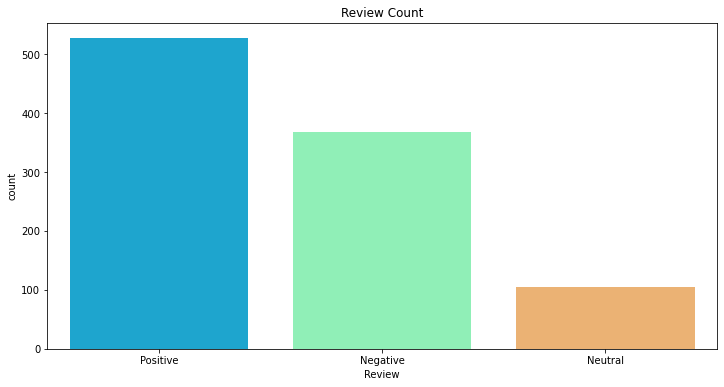

In [30]:
# Review Countplot
plt.figure(figsize=(12,6))
plt.title('Review Count');
sns.countplot(x=data['Review'], data=data, palette='rainbow');

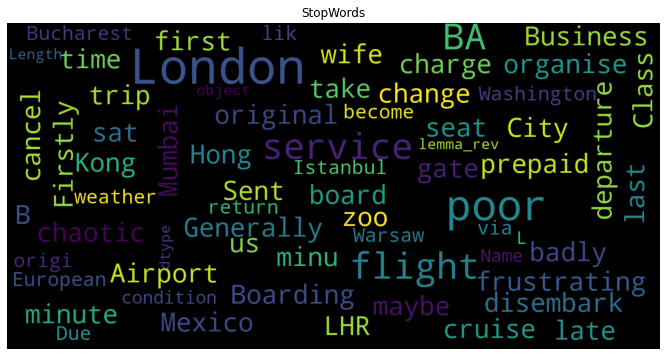

In [31]:
stopwords = set(STOPWORDS)

# Function to generate stopwords
def show_wordcloud(data):
    wordcloud = WordCloud(max_words=150,
                          background_color='black',
                          max_font_size=30,
                          stopwords=stopwords,
                          scale=4,
                          random_state=1)
    wordcloud = wordcloud.generate(str(data))
    
    plt.figure(figsize=(12,6))
    plt.axis('off')
    plt.title('StopWords')
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(data.lemma_rev)